# Dataset Link: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

# Importing library & Data Allocation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from isbnlib import clean  #for ISBN standardization
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#import data
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\Hamed\AppData\Local\Temp\ipykernel_20788\1156513256.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
#first 5 rows of books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#first 5 rows of users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
#first 5 rows of ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
#displays the shape of the datasets (attributes, features)
print("Books Dataset Shape:", books.shape)
print("Users Dataset Shape:", users.shape)
print("Ratings Dataset Shape:", ratings.shape)

Books Dataset Shape: (271360, 8)
Users Dataset Shape: (278858, 3)
Ratings Dataset Shape: (1149780, 3)


In [7]:
#displays the NaN values within all datasets
print("Books Dataset NaN values:", books.isnull().sum())
print("----------------------------------------------------")
print("Users Dataset NaN values:", users.isnull().sum())
print("----------------------------------------------------")
print("Ratings Dataset NaN values:", ratings.isnull().sum())

Books Dataset NaN values: ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
----------------------------------------------------
Users Dataset NaN values: User-ID          0
Location         0
Age         110762
dtype: int64
----------------------------------------------------
Ratings Dataset NaN values: User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [8]:
#checks on duplicates across all datasets
print("Duplicates in books dataset =", books.duplicated().sum())
print("Duplicates in user dataset =",users.duplicated().sum())
print("Duplicates in ratings dataset =",ratings.duplicated().sum())

Duplicates in books dataset = 0
Duplicates in user dataset = 0
Duplicates in ratings dataset = 0


In [9]:
#drops the irrelevant rows
books.drop(books[books['Year-Of-Publication'] == 'DK Publishing Inc'].index, inplace=True)
books.drop(books[books['Year-Of-Publication'] == 'Gallimard'].index, inplace=True)

In [121]:
#standardize ISBNs
ratings['ISBN'] = ratings['ISBN'].apply(clean)
books['ISBN'] = books['ISBN'].apply(clean)

In [13]:
#convert Year-Of-Publication to int and filter out invalid entries
books = books.astype({'Year-Of-Publication': 'int'})
books = books[books['Year-Of-Publication'] >= 1900]

In [10]:
#statistics of books dataset
books.describe().T

,count,unique,top,freq
ISBN,271357,271357,0195153448,1
Book-Title,271357,242132,Selected Poems,27
Book-Author,271355,102020,Agatha Christie,632
Year-Of-Publication,271357,200,2002,13903
Publisher,271355,16804,Harlequin,7535
Image-URL-S,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2
Image-URL-M,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2
Image-URL-L,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2


In [11]:
#statistics of ratings dataset
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [12]:
#statistics of users dataset
users.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


In [15]:
#merge books and ratings dataset to find ratings on each book
ratings_with_names = pd.merge(books, ratings, on='ISBN')

In [16]:
# Check for missing book titles after merge
missing_books = ratings_with_names[ratings_with_names['Book-Title'].isna()]
if not missing_books.empty:
    print(f"Books not found during merge: {missing_books[['ISBN', 'Book-Title']].head()}")

In [17]:
ratings_with_names.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


# Exploratory Data Analysis (EDA)

In [18]:
#top 10 books and authors have 10 ratings
ratings_with_names.sort_values(by='Book-Rating' , ascending=False).head(10)[['Book-Title', 'Book-Author']]

,Book-Title,Book-Author
508559,Dragons of Winter Night,Margaret Weis
118859,The Hours: A Novel,Michael Cunningham
356041,The Foot Book (Nifty Lift-And-Look Books),Dr. Seuss Enterprises
118838,The Hours: A Novel,Michael Cunningham
356053,The Association,Bentley Little
356063,The Association,Bentley Little
802824,N Is for Noose,Sue Grafton
715285,The Green Mile : The Complete Serial Novel,Stephen King
118827,The Hours: A Novel,Michael Cunningham
356076,A Ride into Morning: The Story of Tempe Wick,Ann Rinaldi


In [19]:
#top 10 authors have overall maximum ratings
ratings_with_names.groupby(['Book-Author']).sum().sort_values(by='Book-Rating' , ascending=False).head(10).index

Index(['Stephen King', 'Nora Roberts', 'John Grisham', 'James Patterson',
       'J. K. Rowling', 'Mary Higgins Clark', 'Janet Evanovich',
       'Dean R. Koontz', 'Sue Grafton', 'Anne Rice'],
      dtype='object', name='Book-Author')

In [20]:
#top 10 authors have overall mimimum ratings
ratings_with_names.groupby(['Book-Author']).sum().sort_values(by='Book-Rating').head(10).index

Index(['Joseph Gerard Brennan', 'Julie Adams Church', 'Julie Bertagna',
       'Julie Bettie', 'Julie Brinckloe', 'Julie Chimes', 'Julie Coryell',
       'Julie Dalton', 'Julie Davey', 'Julie Degalan'],
      dtype='object', name='Book-Author')

In [21]:
#top 10 books and authors have 0 ratings
ratings_with_names.sort_values(by='Book-Rating').head(10)[['Book-Title', 'Book-Author']]

,Book-Title,Book-Author
0,Classical Mythology,Mark P. O. Morford
602938,Bastion Falls,Susie Moloney
602939,Bastion Falls,Susie Moloney
602940,Bastion Falls,Susie Moloney
602941,Bastion Falls,Susie Moloney
602942,Bastion Falls,Susie Moloney
602943,Bastion Falls,Susie Moloney
602945,After the Rain,Norma Fox Mazer
602946,After the Rain,Norma Fox Mazer
602947,After the Rain,Norma Fox Mazer


In [22]:
#how many books were published in each year
ratings_with_names['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    91800
2001    79801
1999    75194
2003    72538
2000    72326
        ...  
1904        1
2008        1
1919        1
2024        1
2037        1
Name: count, Length: 111, dtype: int64

In [23]:
#the maximun books published by a single author
ratings_with_names['Book-Author'].value_counts()

Book-Author
Stephen King           9967
Nora Roberts           8427
John Grisham           5958
James Patterson        5839
Mary Higgins Clark     4768
                       ... 
Mel Blount                1
Enno Littmann             1
Laurie Devine             1
Roger Englander           1
Christopher  Biffle       1
Name: count, Length: 100237, dtype: int64

In [24]:
#maximum people give rating on books are
ratings_with_names['Book-Title'].value_counts()

Book-Title
Wild Animus                                                                                                                       2502
The Lovely Bones: A Novel                                                                                                         1295
The Da Vinci Code                                                                                                                  897
A Painted House                                                                                                                    838
The Nanny Diaries: A Novel                                                                                                         828
                                                                                                                                  ... 
The case of the smoking chimney                                                                                                      1
World War II: A 50th Anniversary History    

# Data Visualization

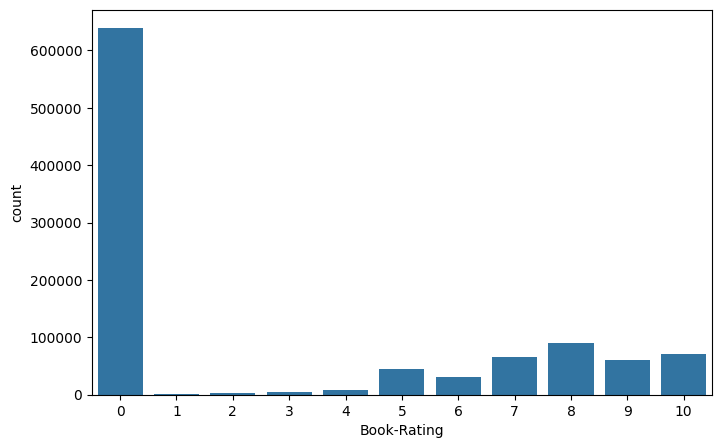

In [25]:
#bar graph according to rating on books
plt.figure(figsize=(8,5))
sns.countplot(x='Book-Rating', data=ratings_with_names)
plt.show()

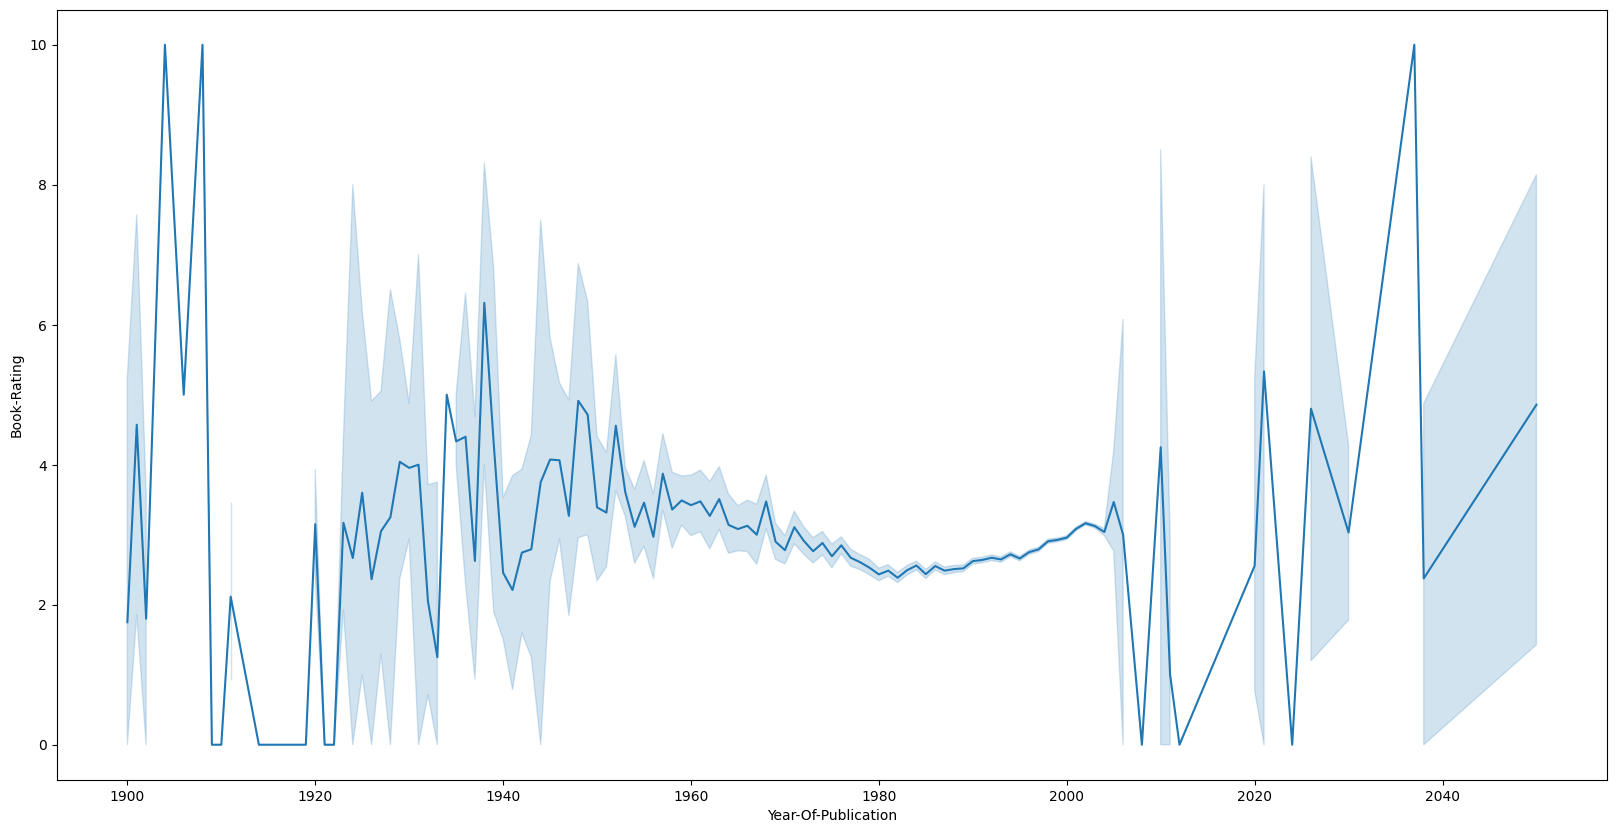

In [26]:
#lineplot according to year of publication and ratings on books
plt.figure(figsize=(20,10))
sns.lineplot(x='Year-Of-Publication',y='Book-Rating', data=ratings_with_names)
plt.show()

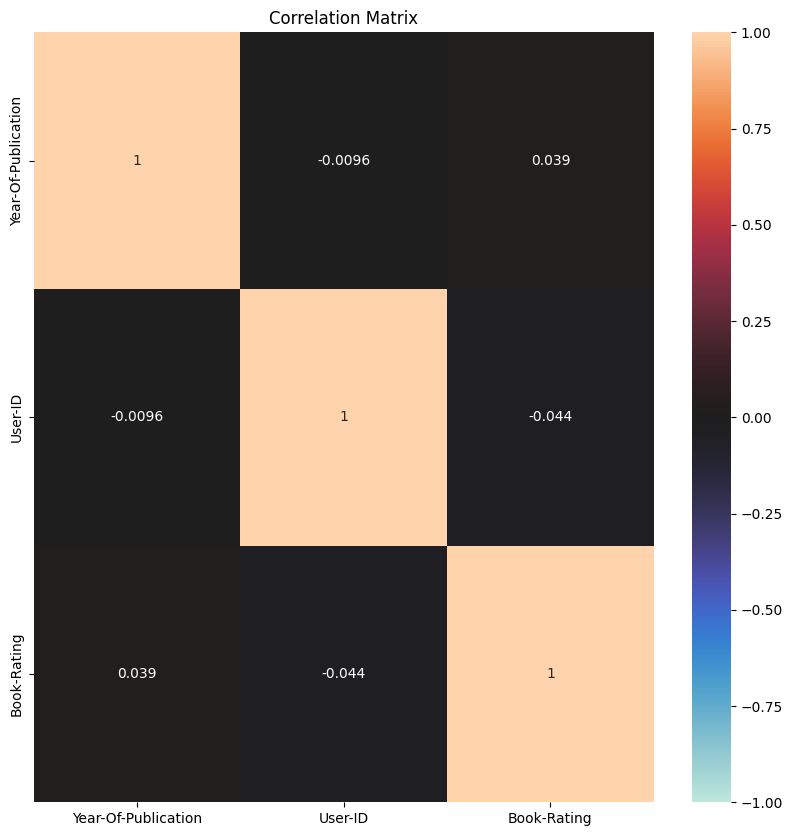

In [27]:
#select only numeric columns for the correlation matrix
numeric_columns = ratings_with_names.select_dtypes(include=['number'])

#check if there are numeric columns to proceed
if not numeric_columns.empty:
    plt.figure(figsize=(10, 10))
    sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, center=0, annot=True)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns available for correlation matrix.")

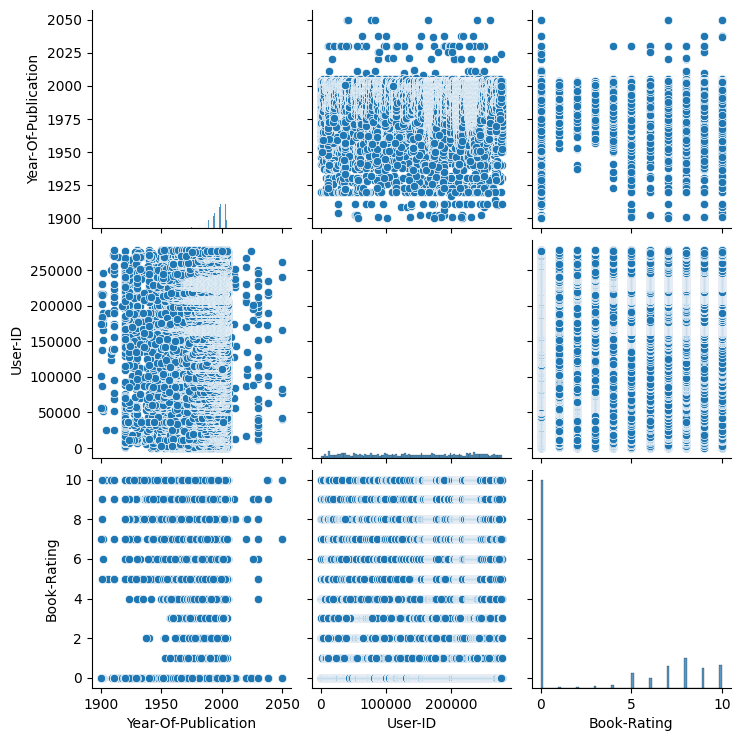

In [28]:
sns.pairplot(data=ratings_with_names)
plt.show()

Top 50 Books with 250 ratings 

In [29]:
#books with number of people rating on it
num_rating_df = ratings_with_names['Book-Title'].value_counts().reset_index()
num_rating_df = num_rating_df.rename(columns={'index' : 'Book-Title' , 'Book-Title' : 'num_ratings'})
num_rating_df.head()

,num_ratings,count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,897
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


In [33]:
#average ratings for each book
avg_rating_df = ratings_with_names.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df = avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'})
print(avg_rating_df.head())

                                          Book-Title  avg_rating
0   A Light in the Storm: The Civil War Diary of ...        2.25
1                              Always Have Popsicles        0.00
2               Apple Magic (The Collector's series)        0.00
3   Ask Lily (Young Women of Faith: Lily Series, ...        8.00
4   Beyond IBM: Leadership Marketing and Finance ...        0.00


In [34]:
#ensures the Book-Title feature is included
num_rating_df = ratings_with_names.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df = num_rating_df.rename(columns={'Book-Rating': 'num_ratings'})
print(num_rating_df.columns)
print(avg_rating_df.columns)

Index(['Book-Title', 'num_ratings'], dtype='object')
Index(['Book-Title', 'avg_rating'], dtype='object')


In [35]:
#top 50 books where ratings 250 people rating on it
popularity_df = pd.merge(num_rating_df, avg_rating_df, on='Book-Title')
popularity_df = popularity_df[popularity_df['num_ratings'] > 250].sort_values('avg_rating', ascending=False).head(50)
popularity_df = pd.merge(popularity_df, books, on='Book-Title').drop_duplicates('Book-Title')
popularity_df = popularity_df[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-M']]
print(popularity_df.head())

                                           Book-Title    Book-Author  \
0   Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   
3        Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
5      Harry Potter and the Sorcerer's Stone (Book 1)  J. K. Rowling   
9   Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
13   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   

    Year-Of-Publication   Publisher  \
0                  1999  Scholastic   
3                  2000  Scholastic   
5                  1998  Scholastic   
9                  2003  Scholastic   
13                 2000  Scholastic   

                                          Image-URL-M  
0   http://images.amazon.com/images/P/0439136350.0...  
3   http://images.amazon.com/images/P/0439139597.0...  
5   http://images.amazon.com/images/P/0590353403.0...  
9   http://images.amazon.com/images/P/043935806X.0...  
13  http://images.amazon.com/images/P/0439064872.0..

# Colleborative Filtering

In [36]:
#books on which more than 200 people rating on it
x = ratings_with_names.groupby('User-ID').count()['Book-Rating']>200
rated_users = x[x].index
Filtered_users = ratings_with_names[ratings_with_names['User-ID'].isin(rated_users)]

In [37]:
#users who have rated more than 50 books
y = Filtered_users['Book-Title'].value_counts()>=50
famous_books = y[y].index
Final_ratings = Filtered_users[Filtered_users['Book-Title'].isin(famous_books)]

In [38]:
#pivot table for vertorization
pt = Final_ratings.pivot_table(index= 'Book-Title', columns=('User-ID'), values='Book-Rating')

In [39]:
#perform mean imputation to make sure NaN doesn't hurt models preformance
pt = pt.apply(lambda row: row.fillna(row.mean()), axis=1)
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.000000,3.266667,3.266667,3.266667,3.266667,3.266667,3.266667,3.266667,3.266667,3.266667,...,10.000000,3.266667,3.266667,3.266667,3.266667,3.266667,0.000000,3.266667,3.266667,3.266667
1st to Die: A Novel,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,9.000000,...,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457,2.281457
2nd Chance,2.411504,10.000000,2.411504,2.411504,2.411504,2.411504,2.411504,2.411504,2.411504,0.000000,...,2.411504,2.411504,2.411504,2.411504,2.411504,0.000000,2.411504,2.411504,0.000000,2.411504
4 Blondes,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.000000,0.985714,0.985714,...,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714
A Bend in the Road,0.000000,1.637615,7.000000,1.637615,1.637615,1.637615,1.637615,1.637615,1.637615,1.637615,...,1.637615,0.000000,1.637615,1.637615,1.637615,1.637615,1.637615,1.637615,1.637615,1.637615


In [41]:
#similar vectors
similarity_score = cosine_similarity(pt)

In [42]:
similarity_score.shape #displays the new shape after preforming cosine similarity

(698, 698)

In [ ]:
result = np.where(pt.index == '1984')[0][0]  #checks the index of 1984 in the Dataframe 
print(f"The position of '1984' in the index is: {result}")

In [46]:
#this line is used to retrieve the top 10 most similar item (i.e, 1984) while excluding the item itself
print(sorted(list(enumerate(similarity_score[result])), key=lambda x: x[1], reverse=True)[1:11])

[(557, 0.9185115446404608), (93, 0.9092586232069816), (534, 0.9039067787956151), (118, 0.902149702898575), (227, 0.9003155275846223), (691, 0.8991079537201948), (218, 0.8958445080847964), (192, 0.8952782257550852), (349, 0.8941089091554713), (142, 0.8940891155285338)]


This function checks for the <book_name> in the dataset first. if so, it will find the book's index and then retrieve the top-10 similair books based on the similarity_score

In [47]:
def recommend(book_name):
    if book_name not in pt.index:
        print(f"Book '{book_name}' not found in the dataset.")
        return
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:11]
    print(f"Top 10 recommended books similar to '{book_name}':")
    for i in similar_items:
        print(pt.index[i[0]])

# Evaulation Metrics

MAE and RMSE to measure prediction accuracy

In [60]:
#calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_ratings, predicted_ratings)

#calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

mae, rmse

(1.0, 1.1547005383792515)

# Testing

In [50]:
#recommends 10 the books based on the entered book
recommend('Night Sins') # insert <book name> to display the top 10 related book 

Unnatural Exposure
The Little Prince
Body of Lies
Guilty Pleasures (Anita Blake Vampire Hunter (Paperback))
The Valley of Horses
Carrie
Wifey
Bleachers
Wizard and Glass (The Dark Tower, Book 4)
Coraline
